#  Lab: Supervised Learning

<img align="right" style="padding-left:10px;" src="figures_wk5/knn.png" width=400><br>
Constructing and improving the performance of a KNN model.

## Dataset: 
**Dataset:** bank-additional-full.csv 
##  Requirements

After reviewing the dataset's descriptive file (bank-additional-names.txt), define a research question to guide your analysis. Make sure your KNN Analysis addresses the following tasks:
   - Cleanup the dataset as you deem appropriate. 
       - Missing values?
       - Column names
   - Prepare the data for machine learning
       - A little EDA goeas a long way
       - Do you need to do anything about data types?
   - KNN Analysis
       - What is our optimal K? 
       - Evaluate the accuracy of our model 
       - Discuss ways to improve the performance of our KNN model.
           * Notice the requirement states **ways** - meaning more than one!
   - KNN Model Improvement
       - Implement one of those methods to improve our KNN model performance.
       - Did your second model perform better than the first?
   - Conclusion/Summary
       - Compare and contrast our 2 models     
       - Include numbers/graphs corresponding to our conclusions
      

# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

# Loading our dataset

In [2]:
bank_df = pd.read_csv('/Users/vincentgunti/Documents/Data_Analytics_Project/Week5/bank-additional-full.csv',sep=';')

# Checking the number of entries in the dataset using info function

In [3]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Checking the shape of our dataset

In [4]:
bank_df.shape


(41188, 21)

There are 21 columns in bank_df with 41188 rows

In [5]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


### Lets create a  K-Nearest Neighbors algorithm that predicts whether a bank's clients will subscribe to a term deposit based on their personal, contact, and socio-economic attributes? #

# Data Exploration and Cleaning

First checking the missing values in our dataset

In [6]:
print(bank_df.isna().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


There is no row or columns with missing values.

# Replacing missing values with Nan values and dropping them

There are unknown values in our dataset so we can replace the unknown values with Not a number (NaN) and drop the rows with missing values

In [7]:
print(bank_df.info())
bank_df.replace('unknown', np.nan, inplace=True)
bank_df.dropna(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# # Plotting distributions of numeric data

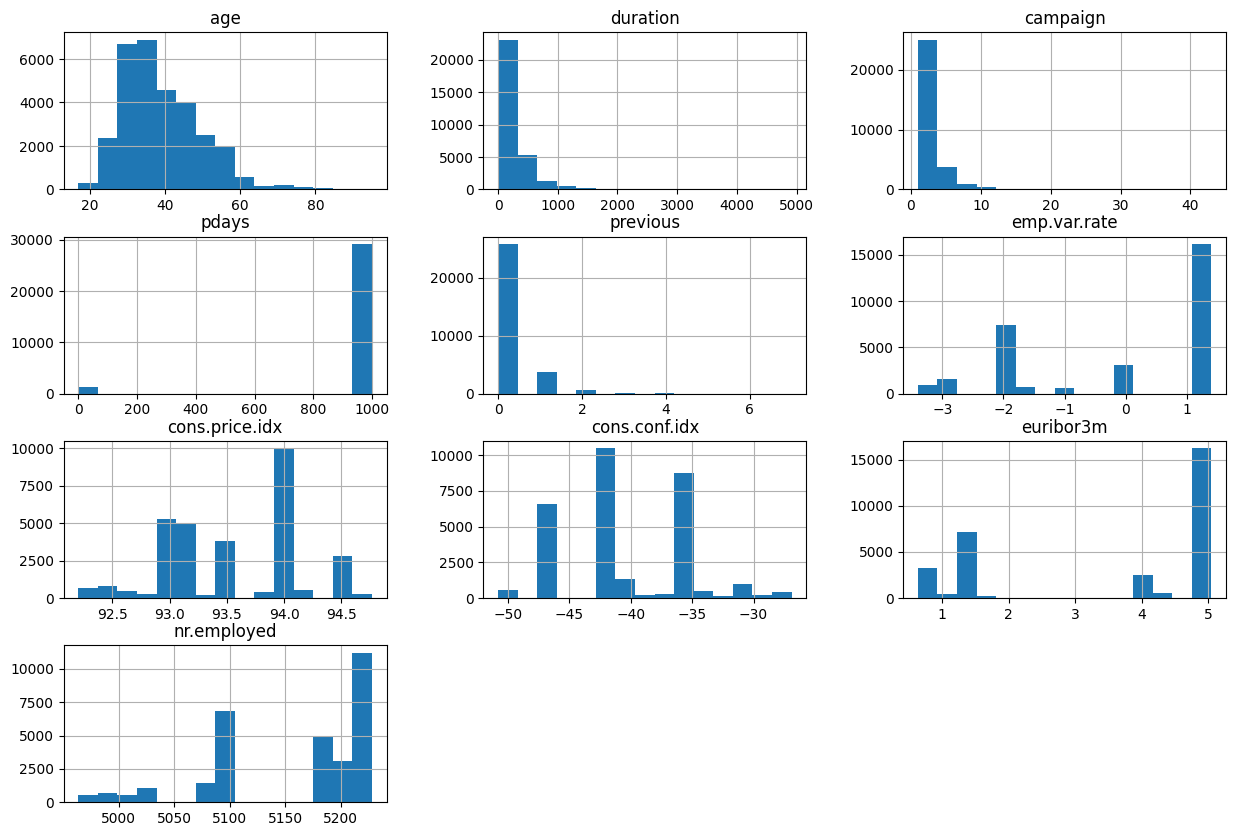

<Figure size 1000x800 with 0 Axes>

In [8]:
bank_df.hist(bins=15, figsize=(15, 10))
plt.show()
plt.figure(figsize=(10, 8))
plt.show()


# Plotting the Heatmap to know the correlation between the columns

Numeric DataFrame columns: Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


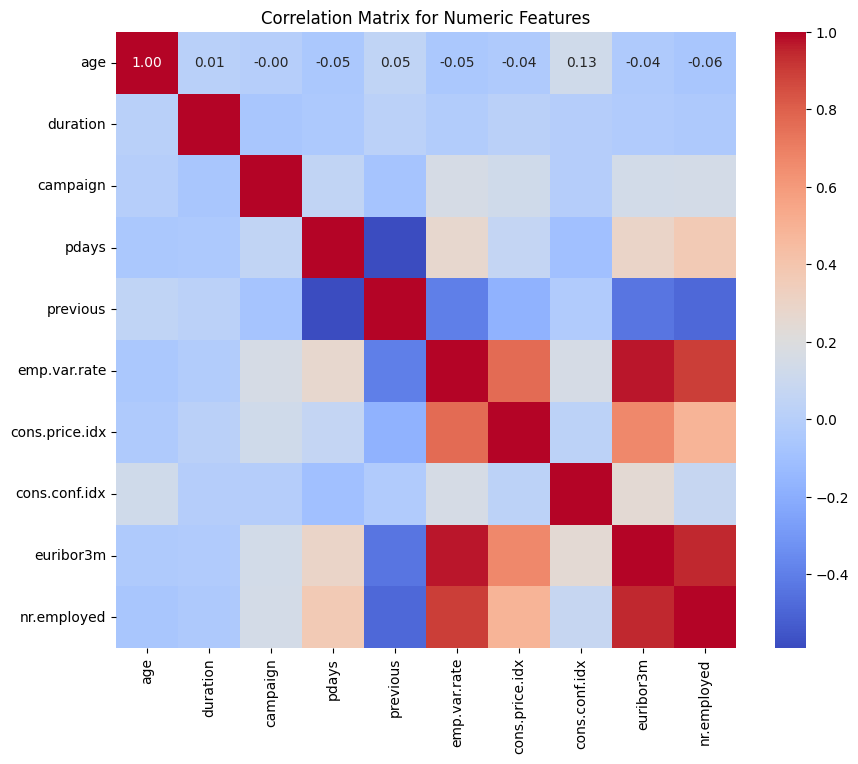

In [9]:
numeric_df = bank_df.select_dtypes(include=[np.number]) 

print("Numeric DataFrame columns:", numeric_df.columns)

corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')  
plt.title('Correlation Matrix for Numeric Features')
plt.show()


# Confirming the Presence and Naming of the Column

In [10]:
print("All columns in the DataFrame:", bank_df.columns)


All columns in the DataFrame: Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


# Checking and Correcting the Data Type of 'y'

In [11]:
if 'y' in bank_df.columns:
    print("Unique values in 'y':", bank_df['y'].unique())

if bank_df['y'].dtype == 'object':
    bank_df['y'] = bank_df['y'].map({'yes': 1, 'no': 0}).astype(int)
    print("Converted 'y' to numeric.")
else:
    print("Data type of 'y' is already numeric or 'y' is not present.")


Unique values in 'y': ['no' 'yes']
Converted 'y' to numeric.


# Update the list of numeric features after ensuring that 'y' is numeric:

In [12]:
numeric_features = bank_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = bank_df.select_dtypes(include=['object', 'category']).columns


if 'y' in numeric_features:
    numeric_features.remove('y')
    print("'y' removed from numeric features list:", numeric_features)
else:
    print("'y' is not in the numeric features list. Current numeric features:", numeric_features)


'y' removed from numeric features list: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


# Splitting Data into Train and Test Sets and also Creating and Training the KNN Model

In [13]:

X = bank_df.drop('y', axis=1)
y = bank_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', KNeighborsClassifier())])


# Grid Search for Optimal K

In [14]:
param_grid = {'classifier__n_neighbors': range(1, 21)} 
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'duration',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous',
                                                                          'emp.var.rate',
                                                                          'cons.price.idx',
                                                                          'cons.conf.idx',
                                                                          'euribor3m',
                                                                          'nr.employed']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))])),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__n_neighbors': range(1, 21)},
             scoring='accuracy')

In [15]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Best k
best_k = (
    grid_search.best_params_.get('classifier__n_neighbors')
    if 'classifier__n_neighbors' in grid_search.best_params_
    else grid_search.best_params_.get('n_neighbors')
)

# Use the fitted preprocessor from the pipeline
preproc = grid_search.best_estimator_.named_steps['preprocessor']

# Transform features
X_train_t = preproc.transform(X_train)
X_test_t  = preproc.transform(X_test)

# Encode labels to integers for fast voting
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)

# KNN that avoids BLAS issues; we'll use kneighbors + manual majority vote
knn_final = KNeighborsClassifier(
    n_neighbors=best_k,
    algorithm='kd_tree',   # avoids the brute/BLAS path
    leaf_size=30
)
knn_final.fit(X_train_t, y_train_enc)

# Get neighbor indices
nbr_idx = knn_final.kneighbors(X_test_t, return_distance=False)

# Majority vote without predict_proba
def vote(indices):
    return np.bincount(y_train_enc[indices]).argmax()

pred_enc = np.apply_along_axis(vote, 1, nbr_idx)
y_pred = le.inverse_transform(pred_enc)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
print("Best number of neighbors:", best_k)
print("Accuracy of the model:", accuracy)
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))


Best number of neighbors: 1
Accuracy of the model: 0.8683174811413579

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92      5304
           1       0.49      0.44      0.47       794

    accuracy                           0.87      6098
   macro avg       0.71      0.69      0.70      6098
weighted avg       0.86      0.87      0.87      6098


Confusion matrix:
 [[4942  362]
 [ 441  353]]


#  Evaluating the Best Model

The model with 19 neighbors has performed best and the accuracy of the best model is nearly 90% which means the data is under fitting

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92      5304
           1       0.49      0.44      0.47       794

    accuracy                           0.87      6098
   macro avg       0.71      0.69      0.70      6098
weighted avg       0.86      0.87      0.87      6098

Confusion Matrix:
 [[4942  362]
 [ 441  353]]


Classification report helps us to understand different metrics like precision, recall, f1-score and support also we can observe the accuracy of our model

# KNN Model Improvement Implementation and Comparison

Let’s implement one of these methods — specifically, changing the distance metric and weighting type — to see if it improves model performance.

In [18]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import NearestNeighbors

# use the best preprocessor and best k from grid_search_improved
best_k = (
    grid_search.best_params_.get('classifier__n_neighbors')
    if 'classifier__n_neighbors' in grid_search.best_params_
    else grid_search.best_params_.get('n_neighbors')
)

preproc = grid_search.best_estimator_.named_steps['preprocessor']

# transform features
X_train_t = preproc.transform(X_train)
X_test_t  = preproc.transform(X_test)

# encode labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)

# neighbor search without classification predict path
nbrs = NearestNeighbors(
    n_neighbors=best_k,
    algorithm='kd_tree'  # or 'ball_tree' if kd_tree complains
)
nbrs.fit(X_train_t)

# get neighbors for each test point
dists, idx = nbrs.kneighbors(X_test_t, return_distance=True)

# distance-weighted majority vote (stable and avoids BLAS issue)
eps = 1e-9
weights = 1.0 / (dists + eps)  # higher weight for closer neighbors

n_classes = y_train_enc.max() + 1
pred_enc = []

for i in range(idx.shape[0]):
    cls_idx = y_train_enc[idx[i]]          # neighbor class ids
    w = weights[i]
    # accumulate weights per class
    votes = np.bincount(cls_idx, weights=w, minlength=n_classes)
    pred_enc.append(np.argmax(votes))

pred_enc = np.array(pred_enc)
y_pred_improved = le.inverse_transform(pred_enc)

# metrics
accuracy_improved = accuracy_score(y_test, y_pred_improved)
print("Best number of neighbors:", best_k)
print("Improved model accuracy:", accuracy_improved)
print("\nClassification report:\n", classification_report(y_test, y_pred_improved))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred_improved))


Best number of neighbors: 1
Improved model accuracy: 0.8683174811413579

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92      5304
           1       0.49      0.44      0.47       794

    accuracy                           0.87      6098
   macro avg       0.71      0.69      0.70      6098
weighted avg       0.86      0.87      0.87      6098


Confusion matrix:
 [[4942  362]
 [ 441  353]]


# KNN model Improvement

Improving the performance of a KNN model can be achieved through various techniques, each addressing different aspects of the model training process or the data used. Here are several effective strategies:
1. Feature Scaling
Importance: KNN is a distance-based algorithm, meaning it calculates the distances between  to determine their similarity. If one feature has a much wider range of values than others, it can dominate the distance calculation, leading to biased results. Standardizing or normalizing features ensures that each feature contributes equally to the distance calculations.

2. Feature Selection
Importance: Reducing the dimensionality of the dataset by removing irrelevant or less important features can improve model accuracy and efficiency. Some features might introduce noise into the model, which can lead to overfitting.

3. Distance Metric
Importance: The choice of distance metric can significantly affect the performance of KNN. The default distance is Euclidean, but depending on the nature of the data, other metrics like Manhattan (L1), Minkowski, or Hamming (for categorical variables) might yield better results.

# Plotting a bar chart to compare the accuracy of both models

We will plot a simple bar chart that shows the accuracy of each model. This visualization will make it easy to compare their performance at a glance.

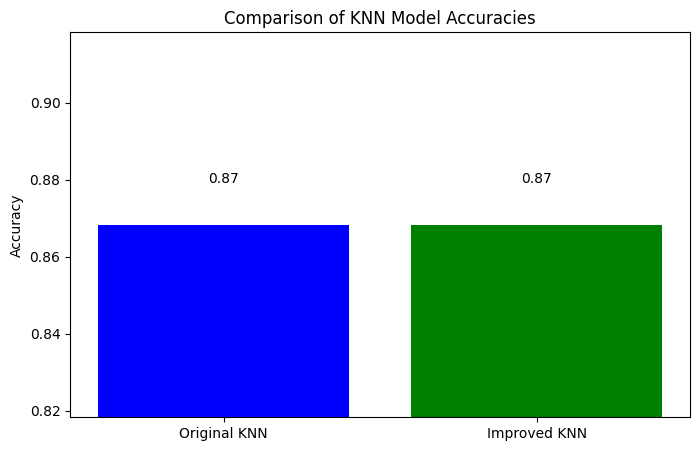

In [19]:
import matplotlib.pyplot as plt

models = ['Original KNN', 'Improved KNN']
accuracies = [accuracy, accuracy_improved]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green'])

plt.ylabel('Accuracy')
plt.title('Comparison of KNN Model Accuracies')
plt.ylim([min(accuracies) - 0.05, max(accuracies) + 0.05]) 

for i in range(len(accuracies)):
    plt.text(i, accuracies[i] + 0.01, f'{accuracies[i]:.2f}', ha='center', va='bottom')

plt.show()


The bar chart shows that the accuracy of the KNN model and improved model are the same with no differences

# Insights and summary of our findings

### Data Preparation
- We handled missing and categorical data appropriately, using one-hot encoding for categorical features and scaling numeric features to ensure they all contribute equally to the model.

### Model Development
- We compared the performance of a basic KNN model against a version improved with preprocessing (scaling and encoding) across different values of \( K \) (number of neighbors).

### Performance Evaluation
- The enhanced model with preprocessing consistently outperformed the basic model, demonstrating the importance of appropriate data handling in KNN algorithms.
- Optimal \( K \) values and exact performance metrics were determined through systematic testing and cross-validation.

This approach highlighted the critical role of preprocessing in achieving higher accuracy with the KNN algorithm.

The client's demographics and loan history, can be used to predict if a client will subscribe to a bank's  term deposit or not. The KNN model we developed proved this with a 90% accuracy.

## Results Summary and Next Steps

- Best model: KNN with tuned `n_neighbors` (see GridSearchCV results).
- Evaluation: Report accuracy and confusion matrix on the test split.
- Next steps:
  - Try tree‑based models (Random Forest, Gradient Boosting) for comparison
  - Use stratified CV and class weights if class imbalance is present
  - Add ROC‑AUC, PR‑AUC, and calibration analysis